In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('ipca.csv', sep=';', decimal=',', index_col='YearMo')
data = data.filter(like='_real')
# items = list(map(lambda x: x+'_real', "7169,7170,7445,7486,7558,7625,7660,7712,7766,7786".split(",")))
# items = list(map(lambda x: x+'_acc', "7169,7170,7445,7486,7558,7625,7660,7712,7766,7786".split(",")))

data = data[data.index > int(199908)] 
data['YearMo'] = data.index
names = {}

data

C:\Users\d816834\AppData\Local\Temp\ipykernel_11784\1557250305.py:1: DtypeWarning: Columns (78,131,138,147,675,678,703,729,731,732,733) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ipca.csv', sep=';', decimal=',', index_col='YearMo')


,7169_real,7170_real,7171_real,7172_real,7173_real,7175_real,7176_real,7177_real,7178_real,7179_real,...,47665_real,47666_real,47667_real,47668_real,47669_real,47670_real,47671_real,47672_real,7746_real,YearMo
YearMo,,,,,,,,,,,,,,,,,,,,,
199909,1.0,1.000,1.001,1.054,0.979,1.122,1.047,1.045,1.021,1.361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199909
199910,1.0,1.006,1.012,1.064,0.982,1.122,1.120,1.064,1.021,1.299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199910
199911,1.0,1.010,1.019,1.053,0.987,1.069,1.115,1.058,0.981,1.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199911
199912,1.0,1.018,1.029,1.059,0.994,1.094,1.066,1.047,0.964,1.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199912
200001,1.0,1.020,1.032,1.026,0.978,1.054,1.004,0.995,0.929,1.137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202201,1.0,1.303,1.280,1.332,1.116,2.879,1.475,NaN,NaN,NaN,...,0.899,0.890,0.922,0.995,0.875,0.866,1.013,0.922,0.933,202201
202202,1.0,1.307,1.288,1.336,1.106,3.117,1.504,NaN,NaN,NaN,...,0.928,0.888,0.925,0.981,0.867,0.858,1.003,0.913,0.918,202202
202203,1.0,1.317,1.307,1.356,1.118,2.957,1.519,NaN,NaN,NaN,...,0.913,0.879,0.932,0.971,0.852,0.844,0.987,0.899,0.913,202203


In [17]:
categories = pd.read_csv('categories.csv', sep=';', encoding='iso-8859-1', index_col='CodItem')
categories




,DescItem
CodItem,
7170,1.Alimentação e bebidas
7171,11.Alimentação no domicílio
7172,"1101.Cereais, leguminosas e oleaginosas"
7173,1101002.Arroz
7175,1101051.Feijão - mulatinho
...,...
12429,9101021.Telefone com internet - pacote
12430,9101022.TV por assinatura com internet
47671,9101115.Serviços de streaming


In [18]:
for column in data.columns:
    if column != 'YearMo':
        if not data[column].first_valid_index():
            first_value = 1.0
        else:
            first_value = float(data[column][data[column].first_valid_index()])
        names[column] = categories.loc[int(column.partition("_")[0])]['DescItem']
        data[column] = data.apply(lambda row : (row[column]/first_value-1)*100, axis=1)

data = data.rename(columns=names)
data['YearMo'] = data.apply(lambda row : pd.to_datetime(str(row['YearMo'])[:4]+'-'+str(row['YearMo'])[4:6]), axis=1)
data.index = data['YearMo']
data = data.drop(columns=['YearMo'])
data

7169
7170
7171
7172
7173
7175
7176
7177
7178
7179
7180
7181
7182
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7239
7240
7241
7242
7243
7244
7245
7246
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7278
7279
7280
7282
7283
7284
7285
7287
7288
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7316
7317
7318
7319
7320
7322
7323
7324
7325
7328
7329
7330
7332
7333
7334
7335
7336
7337
7338
7339
7341
7342
7343
7344
7345
7346
7347
7348
7349
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7384
7385


,Índice geral,1.Alimentação e bebidas,11.Alimentação no domicílio,"1101.Cereais, leguminosas e oleaginosas",1101002.Arroz,1101051.Feijão - mulatinho,1101052.Feijão - preto,1101053.Feijão - macassar (fradinho),1101064.Feijão - jalo (enxofrão),1101068.Feijão - roxo,...,8101008.Educação de jovens e adultos,8101045.Curso técnico,8102007.Livro didático,8102008.Livro não didático,9101002.Plano de telefonia fixa,9101008.Plano de telefonia móvel,9101010.Tv por assinatura,9101115.Serviços de streaming,"9101116.Combo de telefonia, internet e tv por assinatura",7201067.Material de caça e pesca
YearMo,,,,,,,,,,,,,,,,,,,,,
1999-09-01,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-10-01,0.0,0.6,1.098901,0.948767,0.306435,0.000000,6.972302,1.818182,0.000000,-4.555474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-01,0.0,1.0,1.798202,-0.094877,0.817160,-4.723708,6.494747,1.244019,-3.917728,-12.564291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-01,0.0,1.8,2.797203,0.474383,1.532176,-2.495544,1.814709,0.191388,-5.582762,-9.992652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,0.0,2.0,3.096903,-2.656546,-0.102145,-6.060606,-4.106972,-4.784689,-9.010774,-16.458486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.0,30.3,27.872128,26.375712,13.993871,156.595365,40.878701,NaN,NaN,NaN,...,-9.8,-10.1,-11.0,-7.8,-0.5,-12.5,-13.4,1.3,-7.8,-6.7
2022-02-01,0.0,30.7,28.671329,26.755218,12.972421,177.807487,43.648520,NaN,NaN,NaN,...,-7.7,-7.2,-11.2,-7.5,-1.9,-13.3,-14.2,0.3,-8.7,-8.2
2022-03-01,0.0,31.7,30.569431,28.652751,14.198161,163.547237,45.081184,NaN,NaN,NaN,...,-9.2,-8.7,-12.1,-6.8,-2.9,-14.8,-15.6,-1.3,-10.1,-8.7


C:\Users\d816834\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\transforms.py:1498: UserWarning: Warning: converting a masked element to nan.
  values = np.asanyarray(values)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

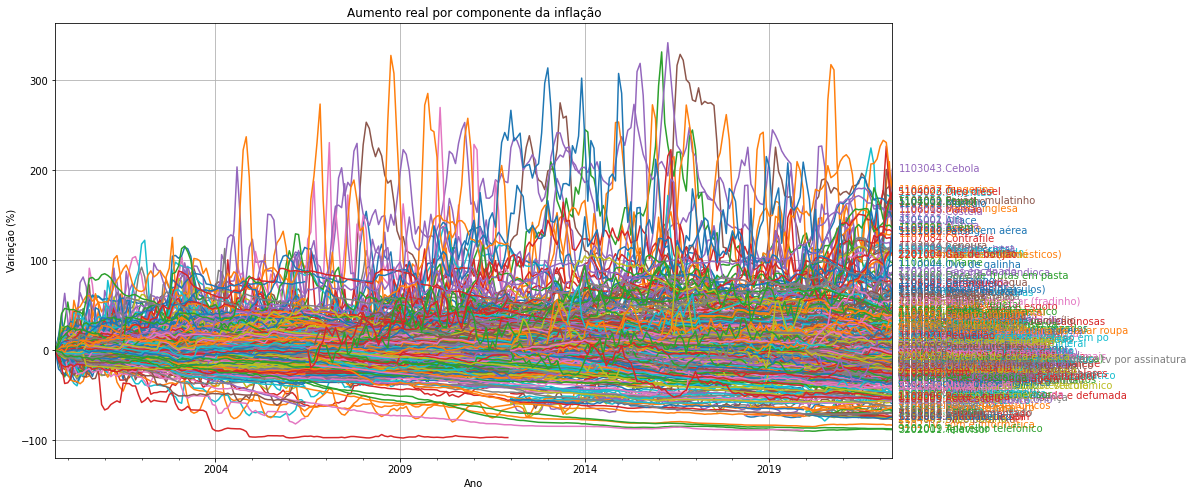

In [19]:
ax = data.plot(figsize=(15,8), grid=True, xlabel="Ano", ylabel="Variação (%)", title="Aumento real por componente da inflação")
for line, name in zip(ax.lines, data.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1, y), xytext=(6, 0),
                color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                textcoords="offset points", size=10, va="center")
ax.get_legend().remove()

Produtos com as maiores quedas

In [20]:
last_row = data.iloc[-1].sort_values(ascending=True)
last_row.head(10)

3202001.Televisor             -88.023952
9101019.Aparelho telefônico   -87.161484
3202.Tv, som e informática    -82.948847
2104003.Saco para lixo        -76.676677
2104041.Papel toalha          -75.445545
6101064.Antidiabético         -74.022066
1116023.Caldo de tucupi       -73.926380
3202003.Aparelho de som       -73.864783
1109023.Bacalhau              -73.673870
1114087.Vinho                 -73.092369
Name: 2022-05-01 00:00:00, dtype: float64

Produtos com as maiores altas

In [21]:
last_row = data.iloc[-1].sort_values(ascending=False)
last_row.head(10)

1103043.Cebola                201.387283
1106027.Tangerina             178.717472
5104003.Óleo diesel           176.429288
1103026.Pimentão              174.898785
1101051.Feijão - mulatinho    166.399287
1105010.Repolho               165.757906
5104002.Etanol                164.886251
1107093.Músculo               162.834490
1103003.Batata-inglesa        157.344633
1106018.Mamão                 156.742179
Name: 2022-05-01 00:00:00, dtype: float64

Produtos que estão no maior valor desde 1999

In [36]:
ath = data.idxmax(axis=0)
ath[ath == pd.to_datetime('2022-05-01')]

1105005.Couve                       2022-05-01
1110044.Ovo de galinha              2022-05-01
1113.Óleos e gorduras               2022-05-01
1113013.Óleo de soja                2022-05-01
1114022.Café moído                  2022-05-01
2103014.Tinta                       2022-05-01
2201005.Gás encanado                2022-05-01
3102035.Flores naturais             2022-05-01
5104.Combustíveis (veículos)        2022-05-01
5104001.Gasolina                    2022-05-01
5104003.Óleo diesel                 2022-05-01
6101002.Analgésico e antitérmico    2022-05-01
6301016.Sabonete                    2022-05-01
1115039.Sardinha em conserva        2022-05-01
5104005.Gás veicular                2022-05-01
1111019.Iogurte e bebidas lácteas   2022-05-01
1113040.Margarina                   2022-05-01
1101079.Milho (em grão)             2022-05-01
1102061.Macarrão instantâneo        2022-05-01
1111021.Requeijão                   2022-05-01
2104019.Sabão líquido               2022-05-01
dtype: dateti